# Exercise 6

Rebecca Ghidoni

ID:2026709
***

## Exercise 1

In [1]:
output <- c(4,1,3,1,3)
len <- length(output)
mu  <- seq(0, 8, 1)

In [2]:
like <- rep(1, length(mu))
for (i in 1:length(output)) {
    like <- like * dpois(x=output[i], lambda=mu)
    }
post <- like / (sum(like))

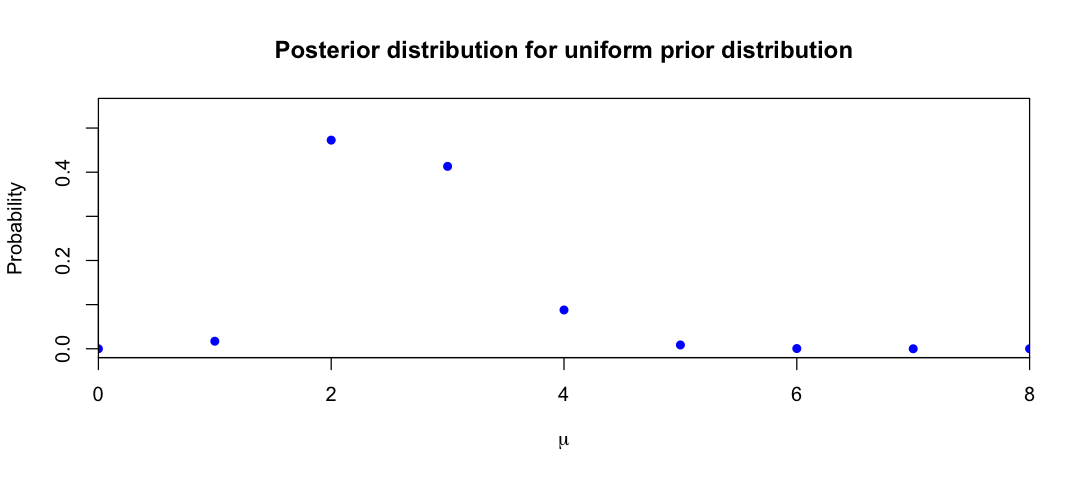

In [3]:
options(repr.plot.width=9, repr.plot.height=4)
plot(mu, post, 
     xaxs='i', yaxs='i', col='blue', lwd = 3, type='p',pch=16,
     ylim=c(-0.02,1.2*max(post)), xlim=c(0,8),
     xlab=expression(mu),
     ylab='Probability',
     main='Posterior distribution for uniform prior distribution')

In [4]:
compute_median <- function(x, d) {

    
    for (i in 1:(length(d)-1)) {
        if (sum(d[1:i])<0.5 & sum(d[1:(i+1)])>0.5) {
            m   <- (sum(d[1:(i+1)]) - sum(d[1:i])) 
            q   <- sum(d[1:i])
            x.m <- (0.5 - q) / m + x[i]
        }
    }
    
    return(x.m)
}

In [5]:
Umed <- compute_median(mu, post)
Umean   <- sum(mu*post)
Uvar    <- sum((mu-Umean)^2 * post)

cat("Median   (uniform prior):", Umed, "\n")
cat("Mean     (uniform prior):", Umean,   "\n")
cat("Variance (uniform prior):", Uvar,"\n")
    
cat("Mean     (uniform prior, analytic):", (sum(output)+1)/length(output), "\n")
cat("Variance (uniform prior, analytic):", (sum(output)+1)/length(output)^2)

Median   (uniform prior): 2.024779 
Mean     (uniform prior): 2.599885 
Variance (uniform prior): 0.5084393 
Mean     (uniform prior, analytic): 2.6 
Variance (uniform prior, analytic): 0.52

In [6]:
jeff_post = function(x){
    dgamma(x,sum(output)+0.5,length(output))
}

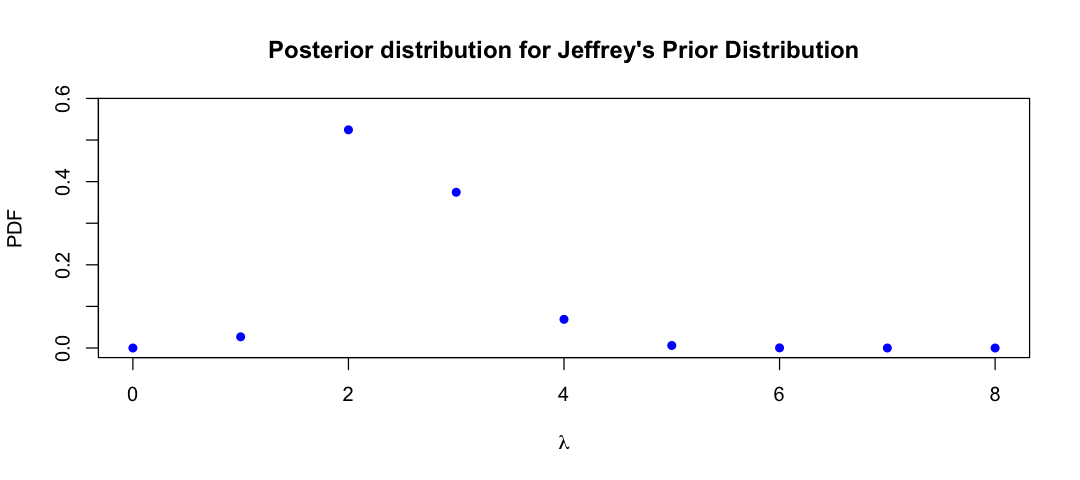

In [7]:
plot(mu,jeff_post(mu), t = "p", pch=16,col='blue', ylim=c(0,1.1*max(jeff_post(mu))),
main = "Posterior distribution for Jeffrey's Prior Distribution", xlab = expression(lambda), ylab = "PDF")

In [8]:
Jmed <- compute_median(mu, jeff_post(mu))
Jmean   <- sum(mu*jeff_post(mu))
Jvar    <- sum((mu-Jmean)^2 * jeff_post(mu))

cat("Median   (Jeffrey's prior):", Jmed, "\n")
cat("Mean     (Jeffrey's prior):", Jmean,   "\n")
cat("Variance (Jeffrey's prior):", Jvar,"\n")
    
#cat("Mean     (uniform prior, analytic):", (sum(output)+1)/length(output), "\n")
#cat("Variance (uniform prior, analytic):", (sum(output)+1)/length(output)^2)

Median   (Jeffrey's prior): 1.901924 
Mean     (Jeffrey's prior): 2.507563 
Variance (Jeffrey's prior): 0.4825687 


In [9]:
cat("The 95% credibility interval for the first posterior is [",qgamma(0.025,13,5),",",qgamma(0.975,13,5),"]\n")
cat("The result given by a normal distribution with the same mean and average is [",qnorm(0.025,mean = Umean, sd = sqrt(Uvar)),",",qnorm(0.975,mean = Umean, sd = sqrt(Uvar)),"]\n")
cat("The 95% credibility interval for the second posterior is [",qgamma(0.025,12.5,5),",",qgamma(0.975,12.5,5),"]\n")
cat("The result given by a normal distribution with the same mean and average is [",qnorm(0.025,mean = Jmean, sd = sqrt(Jvar)),",",qnorm(0.975,mean = Jmean, sd = sqrt(Jvar)),"]")


The 95% credibility interval for the first posterior is [ 1.38439 , 4.192317 ]
The result given by a normal distribution with the same mean and average is [ 1.202334 , 3.997436 ]
The 95% credibility interval for the second posterior is [ 1.311972 , 4.064647 ]
The result given by a normal distribution with the same mean and average is [ 1.146032 , 3.869095 ]

## Exercise 2

In [10]:
generate_data <- function(N,alpha,beta){
                    set.seed(121)
                    theta <- runif(N,-pi/2,pi/2)
                    data <- alpha + beta*tan(theta)
                    return(data)
                 }


N <- 800
alpha <- 10 
beta  <- 50 


data <- generate_data(N,alpha,beta)

In [11]:
# Function to compute the log of the Posterior
log.post.func <- function(data,alpha,beta){
  logL <- 0.0
  for(x in data){
      logL <- logL + log(beta/(pi*(beta^2+(x-alpha)^2))) 
  }
  return(logL)
}

# Grid search list for alpha and beta parameters
n.sample <- 300

x.min <- -50
x.max <- +50
h.x <- (x.max - x.min)/n.sample
alphas <- seq(from=x.min, by=h.x, length.out=n.sample+1)

y.min <- 0
y.max <- 100
h.y <- (y.max - y.min)/n.sample
betas <- seq(from=y.min, by=h.y, length.out=n.sample+1)

In [12]:

f <- function(alpha,beta){ log.post.func(data, alpha, beta) }
log.grid.post.values <- outer(alphas, betas, Vectorize(f))
# Compute the normalized posterior
log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) # Shift for the maximum
y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))
grid.values <- matrix(y.post,nrow=length(alphas), ncol=length(betas))

index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
max.alpha <- alphas[index[1]]
max.beta <- betas[index[2]]
cat("The true values are: ")
cat("alpha=",alpha,"\tbeta=",beta,'\n')
cat("The most probable values for",length(data),"samples are: ")
cat("alpha=",max.alpha,"\tbeta=",max.beta)


The true values are: alpha= 10 	beta= 50 
The most probable values for 800 samples are: alpha= 14 	beta= 48.66667

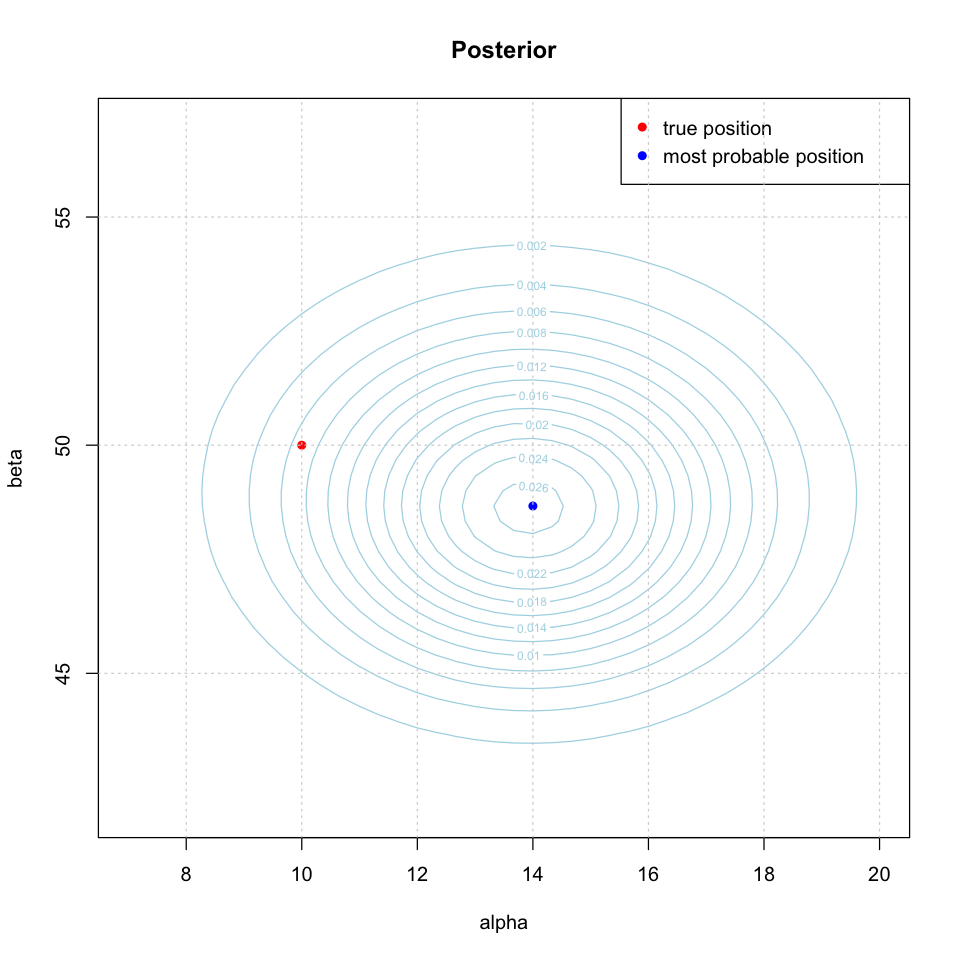

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
# Plot the contour plot of posterior
contour(alphas, betas, y.post, main=paste('Posterior'),
            xlim=c(7,20), ylim=c(42,57), xlab="alpha", ylab="beta",col="lightblue",
            nlevels=10) 

# Plot of the true value of alpha and beta
points(alpha, beta, pch=16, col="red", lwd=2) 

# Plot the most probable values of the Posterior
points(max.alpha, max.beta, pch=16, col="blue", lwd=2) 

legend("topright",c("true position","most probable position"), col=c("red","blue"), pch=16) 
grid()

Increasing the number of generated data, it's possible to near the most possible position with the true position

## Exercise 3

In [14]:
signal <- function(x, a, b, x0, w, t) { t * (a*exp(-(x-x0)**2/(2*w**2)) + b)}

Plot = function (x0,w,A.true,B.true,Delta.t, ddat, xdat,main){
                                        splot <- signal (xdat , A.true , B.true , x0, w, Delta.t)
                                        plot(xdat , ddat , type="s",col="blue", xlim=c(-10,10), 
                                            ylim= range (c(splot , ddat )),xlab="x", ylab=" Signal + Background counts ", main = main)
                                        lines(xdat, splot, col="red")
}

model = function(x0,w,A.true,B.true,Delta.t){
                                        set.seed(205)
                                        xdat <- seq(from=-10, to=10, by=0.5)
                                        s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
                                        ddat <- rpois( length (s.true), s.true)
                return (list(ddat,xdat,s.true))
}



### Change of parameter w

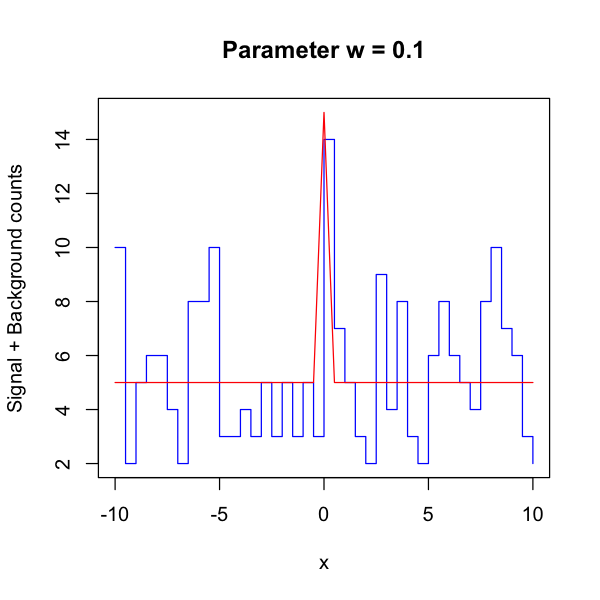

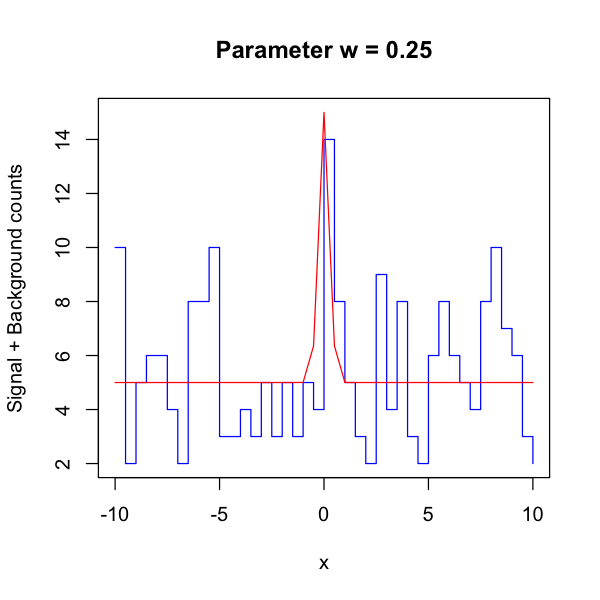

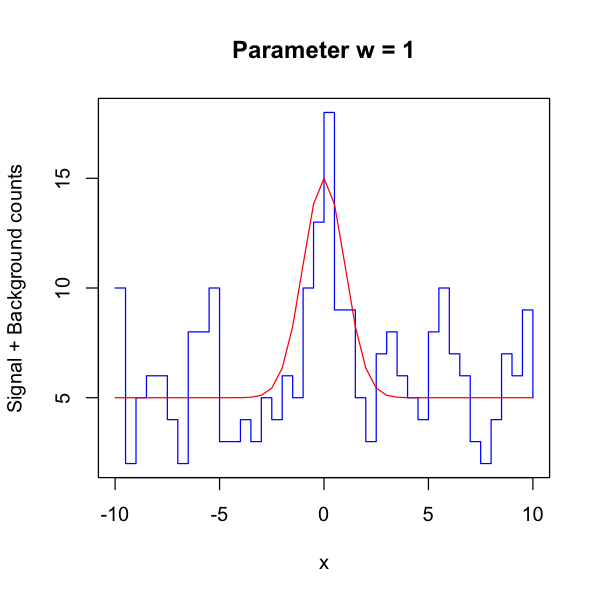

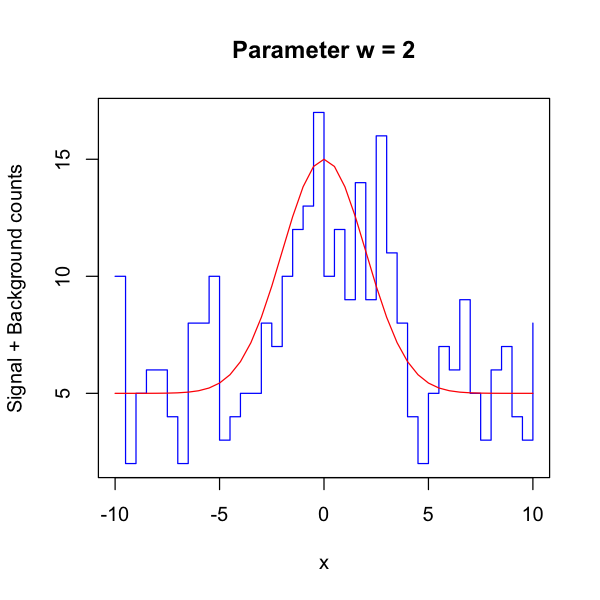

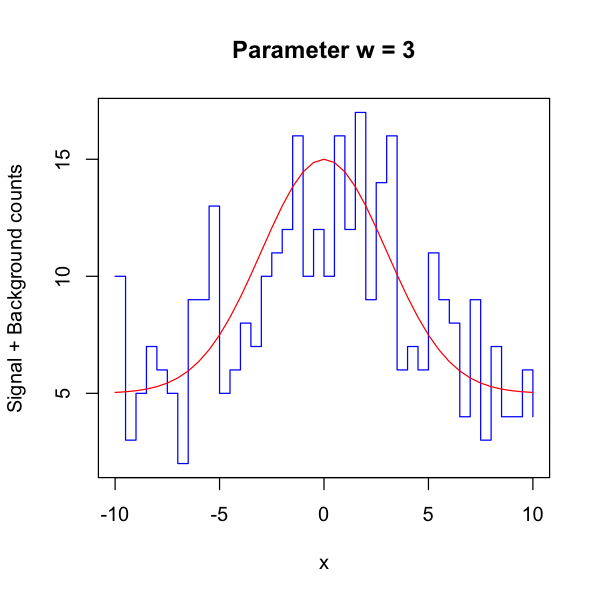

In [15]:
m_1 = model(0,0.1,2,1,5)
m_2 = model(0,0.25,2,1,5)
m_3 = model(0,1,2,1,5)
m_4 = model(0,2,2,1,5)
m_5 = model(0,3,2,1,5)
m = list(m_1,m_2,m_3,m_4,m_5)

options(repr.plot.width = 5, repr.plot.height =5)

w <- c(0.1,0.25,1,2,3)
for (i in 1:length(w)){
    Plot(0,w[[i]],2,1,5,m[[i]][[1]],m[[i]][[2]],main = paste0("Parameter w = ",w[[i]]))
}

Decreasing w leads to a tighter curve

### Change of parameter A/B

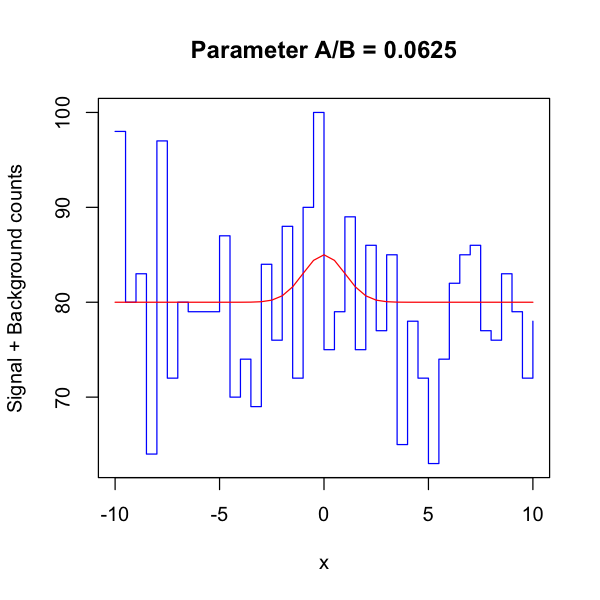

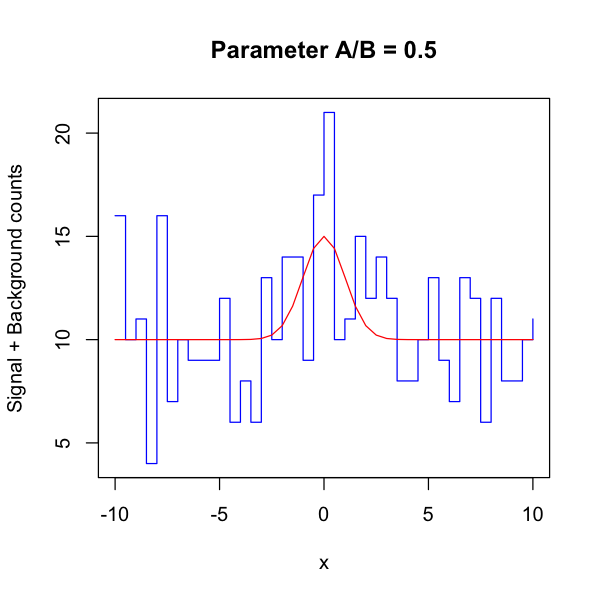

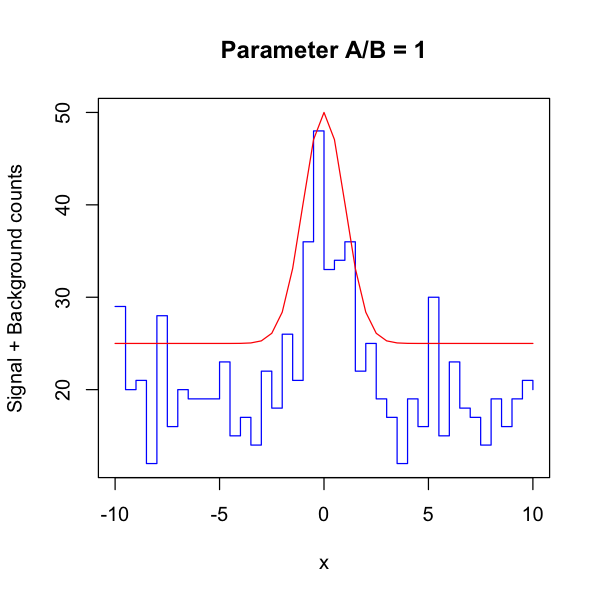

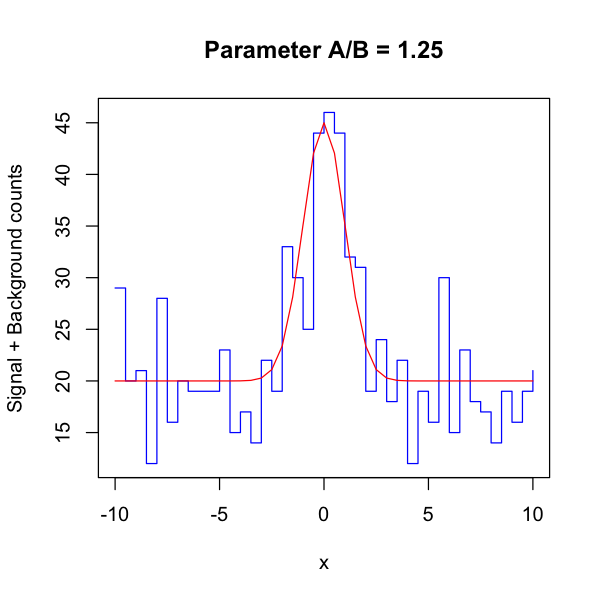

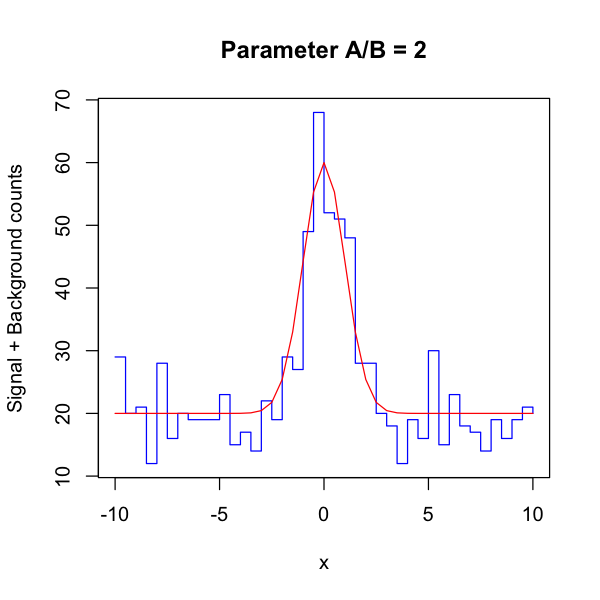

In [16]:
m_1 = model(0,1,1,16,5)
m_2 = model(0,1,1,2,5)
m_3 = model(0,1,4,4,5)
m_4 = model(0,1,5,4,5)
m_5 = model(0,1,8,4,5)
m = list(m_1,m_2,m_3,m_4,m_5)

a <- c(1,1,5,5,8)
b <- c(16,2,5,4,4)
for (i in 1:5){
    Plot(0,1,a[[i]],b[[i]],5,m[[i]][[1]],m[[i]][[2]],main = paste0("Parameter A/B = ",a[[i]]/b[[i]]))
}

Analyzing the results is possible to say that, increasing the parameter A/B, is possible to increase the Signal+Background counts